# Lab 6: Convolutional Neural Networks

### Katherine Wirskye, Lucas Li, Ethan Li, and Kaylie Nguyen (5000-level students)

Link to dataset: **insert this shi**

## Preparation

In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # so that I don't use GPU
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU') # Disable all GPUs

import numpy as np
import matplotlib.pylab as plt

#import pandas as pd
# from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Model
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from PIL import Image
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from keras.regularizers import l2

from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation, RandomZoom

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [9]:
# locate directories
folder = "allimages"

image_directories = [
    os.path.join(folder, "angry"),
    os.path.join(folder, "disgust"),
    os.path.join(folder, "fear"),
    os.path.join(folder, "happy"),
    os.path.join(folder, "neutral"),
    os.path.join(folder, "sad"),
    os.path.join(folder, "surprise")
]

# function to get image paths and the emotion label
def get_image_paths_and_labels(image_directories):
    image_paths = [] #stores image paths
    labels = [] #stores labels

    # goes through each of the 7 directories 
    for i, directory in enumerate(image_directories):
        emotion_label = os.path.basename(directory) # captures the emotion label
        # goes through each image in each directory
        for filename in os.listdir(directory):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_paths.append(os.path.join(directory, filename)) #appends image path to list
                labels.append(emotion_label) # appends emotion label to list

    return image_paths, labels

# gets image path and label for training and testing set
image_paths, image_labels = get_image_paths_and_labels(image_directories)
print(image_paths)
print("Number of images:", len(image_paths))
print("Number of labels:", len(image_labels))

['allimages\\angry\\Training_10118481.jpg', 'allimages\\angry\\Training_10120469.jpg', 'allimages\\angry\\Training_10131352.jpg', 'allimages\\angry\\Training_10161559.jpg', 'allimages\\angry\\Training_1021836.jpg', 'allimages\\angry\\Training_10269675.jpg', 'allimages\\angry\\Training_10278738.jpg', 'allimages\\angry\\Training_10290703.jpg', 'allimages\\angry\\Training_10295477.jpg', 'allimages\\angry\\Training_10315441.jpg', 'allimages\\angry\\Training_10316849.jpg', 'allimages\\angry\\Training_10334355.jpg', 'allimages\\angry\\Training_10345473.jpg', 'allimages\\angry\\Training_10422050.jpg', 'allimages\\angry\\Training_10485618.jpg', 'allimages\\angry\\Training_10503476.jpg', 'allimages\\angry\\Training_10524198.jpg', 'allimages\\angry\\Training_10539399.jpg', 'allimages\\angry\\Training_10592361.jpg', 'allimages\\angry\\Training_10595751.jpg', 'allimages\\angry\\Training_10608067.jpg', 'allimages\\angry\\Training_10740356.jpg', 'allimages\\angry\\Training_10851653.jpg', 'allimages\

In [10]:
def load_and_preprocess_images(image_paths, img_width, img_height):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(img_width, img_height))
        img_array = img_to_array(img)
        img_array /= 255.0 # added this normalization
        images.append(img_array)
    return np.array(images)

img_width = 48
img_height = 48

X = load_and_preprocess_images(image_paths, img_width, img_height)

label_encoder = LabelEncoder()

# Fit and transform the labels for training data
labels_encoded = label_encoder.fit_transform(image_labels)

# Convert the encoded labels to one-hot encoded vectors
y = to_categorical(labels_encoded)

print(len(X), len(y))

allimages\angry\Training_10118481.jpg
allimages\angry\Training_10120469.jpg
allimages\angry\Training_10131352.jpg
allimages\angry\Training_10161559.jpg
allimages\angry\Training_1021836.jpg
allimages\angry\Training_10269675.jpg
allimages\angry\Training_10278738.jpg
allimages\angry\Training_10290703.jpg
allimages\angry\Training_10295477.jpg
allimages\angry\Training_10315441.jpg
allimages\angry\Training_10316849.jpg
allimages\angry\Training_10334355.jpg
allimages\angry\Training_10345473.jpg
allimages\angry\Training_10422050.jpg
allimages\angry\Training_10485618.jpg
allimages\angry\Training_10503476.jpg
allimages\angry\Training_10524198.jpg
allimages\angry\Training_10539399.jpg
allimages\angry\Training_10592361.jpg
allimages\angry\Training_10595751.jpg
allimages\angry\Training_10608067.jpg
allimages\angry\Training_10740356.jpg
allimages\angry\Training_10851653.jpg
allimages\angry\Training_10857340.jpg
allimages\angry\Training_10882484.jpg
allimages\angry\Training_10899258.jpg
allimages\ang

### Performance Metric

**discuss choice here**

### Data Splitting Method

**discuss choice here**

In [30]:
# define the 5-fold stratified cross validation
split_no=5
skf = StratifiedKFold(n_splits=split_no, shuffle=True, random_state=1)

# we can probably changes this to 10 later (10 is probably better for statistical test)

## Modeling

### Data Expansion

I think we're just gonna add the layers actually in the models. I've added some layers for the first one. So we can just talk about the data expansion here :D

So far, we have:
- random horizontal flip
- random rotation
- random translation
- random zoom

*Setup the training to use data expansion in Keras (also called data augmentation). 
Explain why the chosen data expansion techniques are appropriate for your dataset. 
You should make use of Keras augmentation layers, like in the class examples.*

### Model 1

*just for my reference, we can condense this later lol (from ChatGPT obv*)

This Convolutional Neural Network (CNN) is designed for multi-class image classification, specifically targeting 7 distinct categories. The architecture begins with data augmentation layers to improve generalization and robustness. These augmentations, including random horizontal flips, rotations (±10%), translations, and zooms, simulate real-world variations in the input data, helping the model learn to handle diverse scenarios. The augmented data is then processed through a sequence of convolutional layers that progressively extract hierarchical features. The initial convolutional layers use 64 filters with 3×3 kernels to capture low-level features such as edges, followed by max-pooling to downsample and batch normalization to stabilize training. As the layers progress, the filter count increases to 128 and then 256, enabling the model to recognize more complex patterns and abstract features, while additional max-pooling reduces spatial dimensions to make the data manageable for the fully connected layers.

Once the convolutional layers have extracted meaningful features, the model transitions to the dense layers for decision-making. The flattening layer converts the 2D feature maps into a 1D vector, which is then passed through a series of dense layers with 1024, 512, and 128 neurons. Each dense layer refines the feature representations, with ReLU activations introducing non-linearity. Dropout layers are incorporated between the dense layers, with 50% and 25% dropout rates, to reduce overfitting by preventing the model from relying too heavily on specific neurons. The final output layer has 7 neurons with a softmax activation function, generating probabilities for each class, ensuring the outputs sum to 1.

To optimize training, the model uses the Adam optimizer, which adapts the learning rate dynamically, and the categorical cross-entropy loss function, ideal for multi-class classification tasks. Accuracy is tracked as the primary metric during training and evaluation. Regularization techniques like batch normalization and dropout, combined with the augmentation strategies, mitigate overfitting and enhance the model’s ability to generalize to unseen data. This comprehensive architecture enables the CNN to effectively extract, abstract, and classify features, aiming to achieve high accuracy in both training and deployment.

In [12]:
# for tracking performance
training_results_model1_1 = []
testing_results_model1_1 = []

# Using stratified k-fold, we call it like this:
for train_index, test_index in skf.split(X, labels_encoded):
    
    # Split the image arrays
    X_train, X_test = X[train_index], X[test_index]
    # Use one-hot encoded labels for the model
    y_train, y_test = y[train_index], y[test_index]

    # Convert one-hot encoded y_train back to categorical labels for stratification
    y_train_categorical = np.argmax(y_train, axis=1)
    # Create a stratified split for validation
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train_categorical, random_state=1)

    # Kaylie's code yay!
    # build a model
    input_shape = (img_width, img_height, 3)

    model1_1 = Sequential([

        # data expansion and augmentation (should be talked abt previously)
        # these might be decreasing accuracy (I don't know if they're contradicting the pre processing Kaylie did)
        # need to discuss this ^^
        RandomFlip("horizontal"),
        RandomRotation(0.10),
        RandomTranslation(height_factor=0.1, width_factor=0.1),
        RandomZoom(height_factor=0.1, width_factor=0.1),

        # Kaylie's model
        Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
        Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(7, activation='softmax')
    ])

    epochs = 20
    batch_size = 64

    model1_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # traing the model
    history = model1_1.fit(X_train_split, y_train_split, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    # add verbose = 0 later!!

    # track accuracy and loss for training data and validation data
    training_results_model1_1.append({
        'loss': history.history['loss'],
        'accuracy': history.history['accuracy'],
        'val_loss': history.history['val_loss'],
        'val_accuracy': history.history['val_accuracy']
    })

    # evaluate the model on the test data
    test_loss, test_accuracy = model1_1.evaluate(X_test, y_test)
    # add verbose = 0 later!!

    # remove the print statements later
    # we won't want them when we run 10 times
    print('Test Loss: ', test_loss)
    print("Test Accuracy:", test_accuracy)

    testing_results_model1_1.append(test_accuracy)

    # breaking for now so that we don't waste time running it a billion times (actually only five times LOLLLLL)
    break

Epoch 1/20
287/287 [==============================] - 39s 119ms/step - loss: 1.8016 - accuracy: 0.2544 - val_loss: 1.7627 - val_accuracy: 0.2693
Epoch 2/20
287/287 [==============================] - 30s 105ms/step - loss: 1.7002 - accuracy: 0.3073 - val_loss: 1.6063 - val_accuracy: 0.3518
Epoch 3/20
287/287 [==============================] - 31s 107ms/step - loss: 1.6194 - accuracy: 0.3615 - val_loss: 1.5234 - val_accuracy: 0.4152
Epoch 4/20
287/287 [==============================] - 30s 103ms/step - loss: 1.5503 - accuracy: 0.3920 - val_loss: 1.5651 - val_accuracy: 0.3852
Epoch 5/20
287/287 [==============================] - 30s 104ms/step - loss: 1.5074 - accuracy: 0.4105 - val_loss: 1.4800 - val_accuracy: 0.4228
Epoch 6/20
287/287 [==============================] - 30s 104ms/step - loss: 1.4595 - accuracy: 0.4348 - val_loss: 1.4325 - val_accuracy: 0.4641
Epoch 7/20
287/287 [==============================] - 442s 2s/step - loss: 1.4325 - accuracy: 0.4474 - val_loss: 1.4743 - val_accu

179/179 [==============================] - 4s 17ms/step


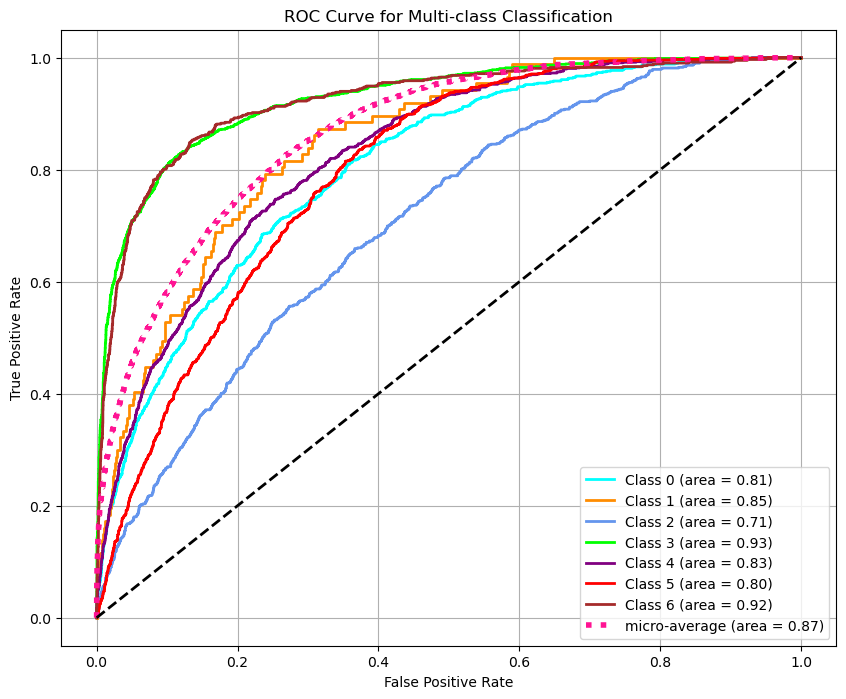

##### Loss Across Training Iterations

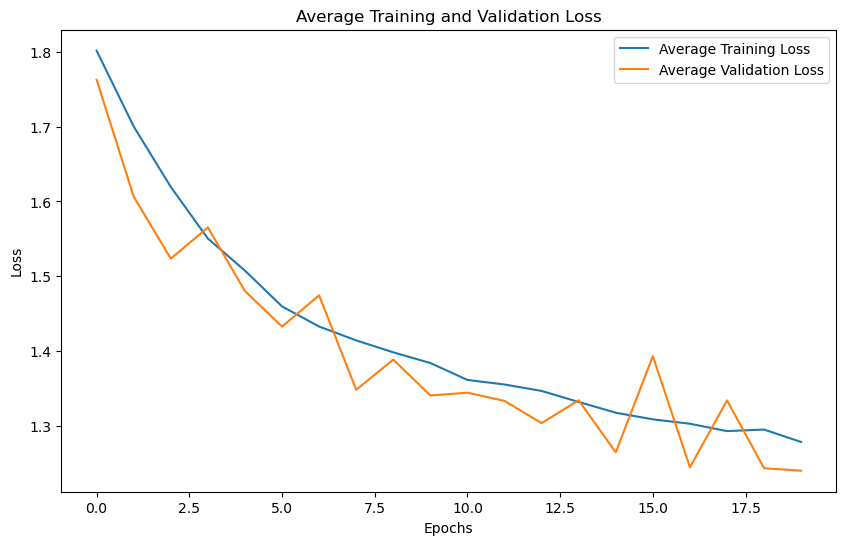

In [13]:
# Get the number of epochs from one of the training histories
num_epochs = len(training_results_model1_1[0]['loss'])

# Initialize lists to store the average loss and validation loss across all instances
avg_loss1_1 = []
avg_val_loss1_1 = []

# Calculate the average loss and validation loss for each epoch
for epoch in range(num_epochs):
    epoch_loss = [result['loss'][epoch] for result in training_results_model1_1]
    epoch_val_loss = [result['val_loss'][epoch] for result in training_results_model1_1]
    
    avg_loss1_1.append(np.mean(epoch_loss))
    avg_val_loss1_1.append(np.mean(epoch_val_loss))

# Plot the average training and validation loss across all instances
plt.figure(figsize=(10, 6))
plt.plot(avg_loss1_1, label='Average Training Loss')
plt.plot(avg_val_loss1_1, label='Average Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss')
plt.legend()
plt.show()

##### Performance Across Training Iterations

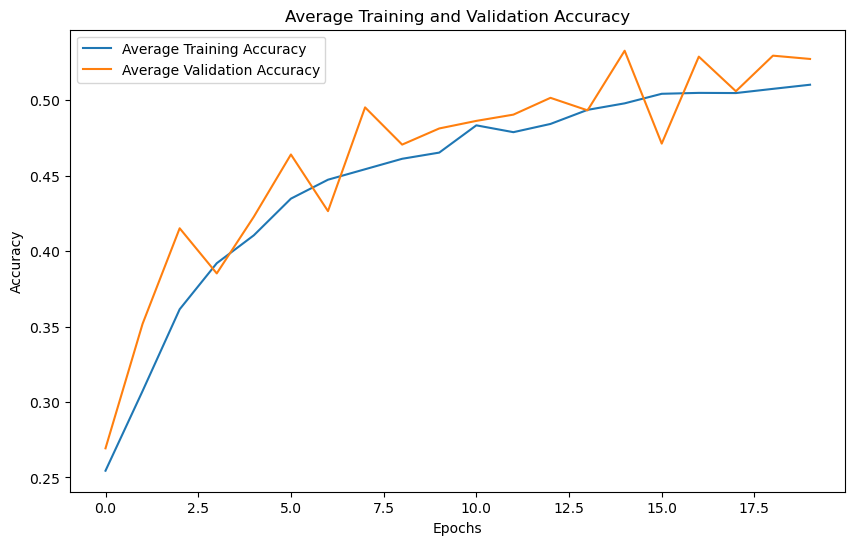

In [14]:
# Initialize lists to store the average accuracy and validation accuracy across all instances
avg_accuracy1_1 = []
avg_val_accuracy1_1 = []

# Calculate the average accuracy and validation accuracy for each epoch
for epoch in range(num_epochs):
    epoch_accuracy = [result['accuracy'][epoch] for result in training_results_model1_1]
    epoch_val_accuracy = [result['val_accuracy'][epoch] for result in training_results_model1_1]
    
    avg_accuracy1_1.append(np.mean(epoch_accuracy))
    avg_val_accuracy1_1.append(np.mean(epoch_val_accuracy))

# Plot the average training and validation accuracy across all instances
plt.figure(figsize=(10, 6))
plt.plot(avg_accuracy1_1, label='Average Training Accuracy')
plt.plot(avg_val_accuracy1_1, label='Average Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.legend()
plt.show()

##### Testing Performance

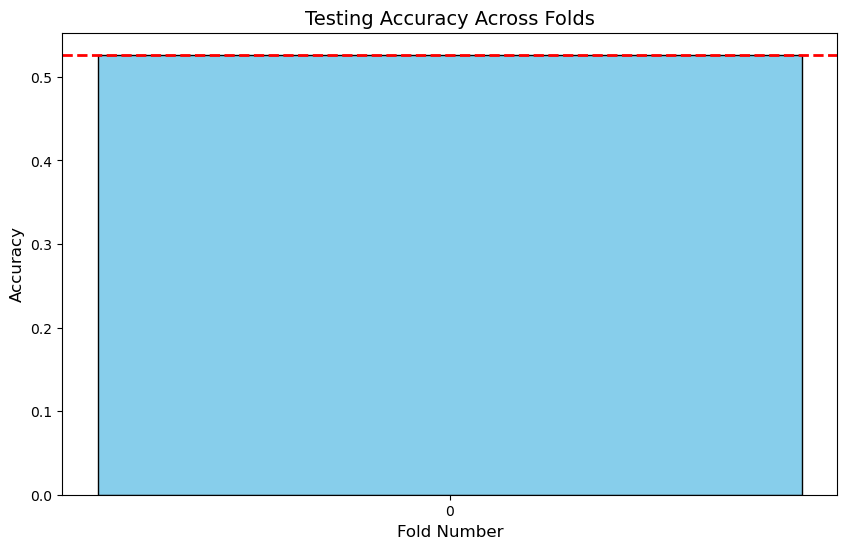

Average Accuracy:  0.5264721512794495
Standard Deviation:  0.0


In [15]:
# Calculate the average tseting accuracy
average1_1 = np.mean(testing_results_model1_1)
std1_1 = np.std(testing_results_model1_1)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(testing_results_model1_1)), testing_results_model1_1, color='skyblue', edgecolor='black', label='Values')

# Plot the average as a horizontal line
plt.axhline(average1_1, color='red', linestyle='--', linewidth=2, label=f'Average ({average1_1:.4f})')

# Add labels and title
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Testing Accuracy Across Folds', fontsize=14)
plt.xticks(range(len(testing_results_model1_1)))

# Show the plot
plt.show()

# Print average and standard deviation for accuracy
print("Average Accuracy: ", average1_1)
print("Standard Deviation: " , std1_1)

#### Model 1 with Changed Parameters

In [16]:
# for tracking performance
training_results_model1_2 = []
testing_results_model1_2 = []

# Using stratified k-fold, we call it like this:
for train_index, test_index in skf.split(X, labels_encoded):
    
    # Split the image arrays
    X_train, X_test = X[train_index], X[test_index]
    # Use one-hot encoded labels for the model
    y_train, y_test = y[train_index], y[test_index]

    # Convert one-hot encoded y_train back to categorical labels for stratification
    y_train_categorical = np.argmax(y_train, axis=1)
    # Create a stratified split for validation
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train_categorical, random_state=1)

    # Kaylie's code yay!
    # build a model
    input_shape = (img_width, img_height, 3)

    model1_2 = Sequential([

        # data expansion and augmentation (should be talked abt previously)
        # these might be decreasing accuracy (I don't know if they're contradicting the pre processing Kaylie did)
        # need to discuss this ^^
        RandomFlip("horizontal"),
        RandomRotation(0.10),
        RandomTranslation(height_factor=0.1, width_factor=0.1),
        RandomZoom(height_factor=0.1, width_factor=0.1),

        # Kaylie's model
        Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
        Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(7, activation='softmax')
    ])

    epochs = 20
    batch_size = 64

    model1_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # traing the model
    history = model1_2.fit(X_train_split, y_train_split, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    # add verbose = 0 later!!

    # track accuracy and loss for training data and validation data
    training_results_model1_2.append({
        'loss': history.history['loss'],
        'accuracy': history.history['accuracy'],
        'val_loss': history.history['val_loss'],
        'val_accuracy': history.history['val_accuracy']
    })

    # evaluate the model on the test data
    test_loss, test_accuracy = model1_2.evaluate(X_test, y_test)
    # add verbose = 0 later!!

    # remove the print statements later
    # we won't want them when we run 10 times
    print('Test Loss: ', test_loss)
    print("Test Accuracy:", test_accuracy)

    testing_results_model1_2.append(test_accuracy)

    # breaking for now so that we don't waste time running it a billion times (actually only five times LOLLLLL)
    break

Epoch 1/20
287/287 [==============================] - 60s 186ms/step - loss: 1.8170 - accuracy: 0.2419 - val_loss: 1.8495 - val_accuracy: 0.1786
Epoch 2/20
287/287 [==============================] - 56s 195ms/step - loss: 1.7160 - accuracy: 0.3019 - val_loss: 1.8117 - val_accuracy: 0.2527
Epoch 3/20
287/287 [==============================] - 50s 175ms/step - loss: 1.6298 - accuracy: 0.3434 - val_loss: 1.6553 - val_accuracy: 0.3606
Epoch 4/20
287/287 [==============================] - 48s 166ms/step - loss: 1.5753 - accuracy: 0.3745 - val_loss: 1.5251 - val_accuracy: 0.4042
Epoch 5/20
287/287 [==============================] - 48s 166ms/step - loss: 1.5234 - accuracy: 0.4058 - val_loss: 1.3984 - val_accuracy: 0.4591
Epoch 6/20
287/287 [==============================] - 50s 175ms/step - loss: 1.4826 - accuracy: 0.4252 - val_loss: 1.4153 - val_accuracy: 0.4545
Epoch 7/20
287/287 [==============================] - 52s 180ms/step - loss: 1.4589 - accuracy: 0.4377 - val_loss: 1.6269 - val_ac

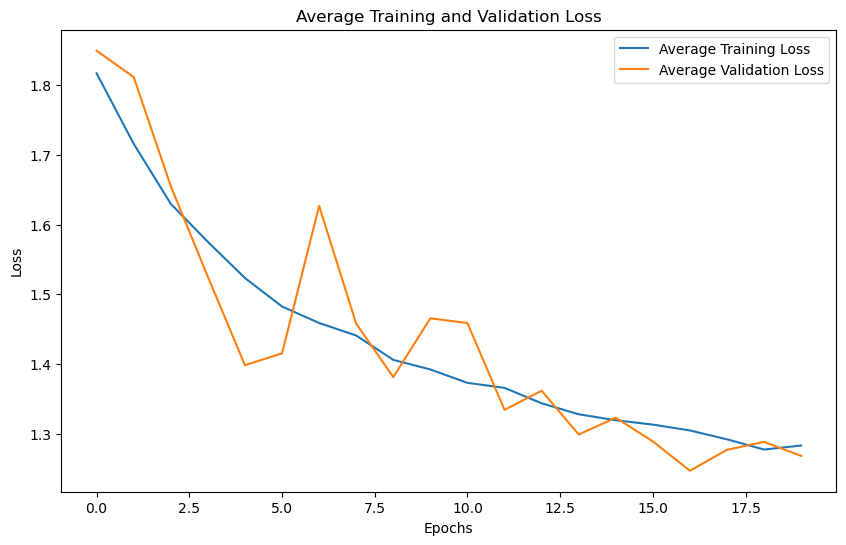

In [17]:
# Get the number of epochs from one of the training histories
num_epochs = len(training_results_model1_2[0]['loss'])

# Initialize lists to store the average loss and validation loss across all instances
avg_loss1_2 = []
avg_val_loss1_2 = []

# Calculate the average loss and validation loss for each epoch
for epoch in range(num_epochs):
    epoch_loss = [result['loss'][epoch] for result in training_results_model1_2]
    epoch_val_loss = [result['val_loss'][epoch] for result in training_results_model1_2]
    
    avg_loss1_2.append(np.mean(epoch_loss))
    avg_val_loss1_2.append(np.mean(epoch_val_loss))

# Plot the average training and validation loss across all instances
plt.figure(figsize=(10, 6))
plt.plot(avg_loss1_2, label='Average Training Loss')
plt.plot(avg_val_loss1_2, label='Average Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss')
plt.legend()
plt.show()

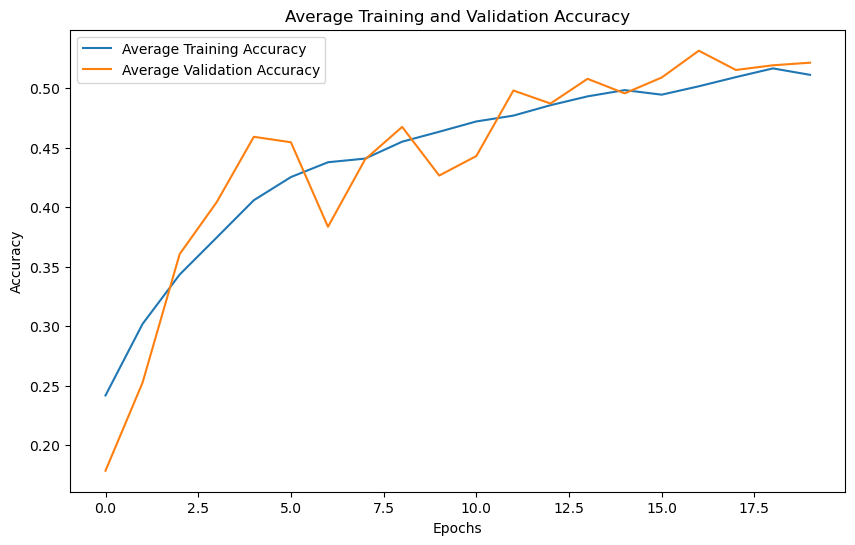

In [18]:
# Initialize lists to store the average accuracy and validation accuracy across all instances
avg_accuracy1_2 = []
avg_val_accuracy1_2 = []

# Calculate the average accuracy and validation accuracy for each epoch
for epoch in range(num_epochs):
    epoch_accuracy = [result['accuracy'][epoch] for result in training_results_model1_2]
    epoch_val_accuracy = [result['val_accuracy'][epoch] for result in training_results_model1_2]
    
    avg_accuracy1_2.append(np.mean(epoch_accuracy))
    avg_val_accuracy1_2.append(np.mean(epoch_val_accuracy))

# Plot the average training and validation accuracy across all instances
plt.figure(figsize=(10, 6))
plt.plot(avg_accuracy1_2, label='Average Training Accuracy')
plt.plot(avg_val_accuracy1_2, label='Average Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.legend()
plt.show()

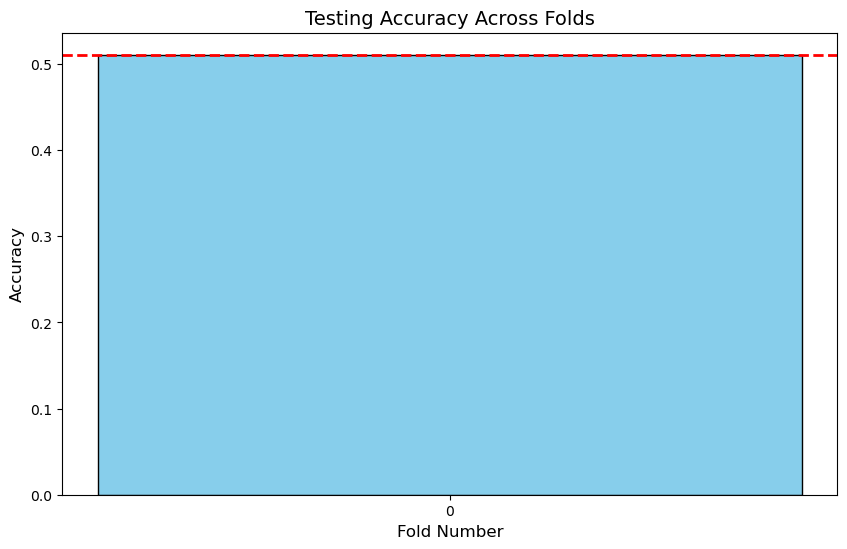

Average Accuracy:  0.5109208226203918
Standard Deviation:  0.0


In [19]:
# Calculate the average tseting accuracy
average1_2 = np.mean(testing_results_model1_2)
std1_2 = np.std(testing_results_model1_2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(testing_results_model1_2)), testing_results_model1_2, color='skyblue', edgecolor='black', label='Values')

# Plot the average as a horizontal line
plt.axhline(average1_2, color='red', linestyle='--', linewidth=2, label=f'Average ({average1_1:.4f})')

# Add labels and title
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Testing Accuracy Across Folds', fontsize=14)
plt.xticks(range(len(testing_results_model1_2)))

# Show the plot
plt.show()

# Print average and standard deviation for accuracy
print("Average Accuracy: ", average1_2)
print("Standard Deviation: " , std1_2)

### Model 2 (Trying Larson's with the same parameters)

In [20]:
# for tracking performance
training_results_model2_1 = []
testing_results_model2_1 = []

# Using stratified k-fold, we call it like this:
for train_index, test_index in skf.split(X, labels_encoded):
    
    # Split the image arrays
    X_train, X_test = X[train_index], X[test_index]
    # Use one-hot encoded labels for the model
    y_train, y_test = y[train_index], y[test_index]

    # Convert one-hot encoded y_train back to categorical labels for stratification
    y_train_categorical = np.argmax(y_train, axis=1)
    # Create a stratified split for validation
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train_categorical, random_state=1)

    ### REPLACE THIS    
    # changes: 
    #    1. Baseline: 2 conv layers and two output layers
    cnn1 = Sequential()

    # data augmentation 
    cnn1.add(RandomFlip("horizontal"))
    cnn1.add(RandomRotation(0.10))
    cnn1.add(RandomTranslation(height_factor=0.1, width_factor=0.1))
    cnn1.add(RandomZoom(height_factor=0.1, width_factor=0.1))

    num_filt_layers = [24, 24]
    for num_filters in num_filt_layers:
        cnn1.add( Conv2D(filters=num_filters, 
                        kernel_size=(3,3), 
                        padding='same') )
        cnn1.add( Activation('relu'))
        cnn1.add( MaxPooling2D(pool_size=(2, 2), 
                            ) )
        

    # add one layer on flattened output
    cnn1.add( Flatten() )
    cnn1.add( Dense(1024, activation='relu') )
    cnn1.add( Dense(512, activation='relu') )
    cnn1.add( Dense(128, activation='relu') )
    cnn1.add( Dense(7, activation='softmax') )

    # Let's train the model 
    cnn1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    input_shape = [None, 48,48,3]
    cnn1.build(input_shape)

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras
    history = cnn1.fit(X_train_split, y_train_split, 
            batch_size=64, epochs=20, 
            shuffle=True, verbose=1,
            validation_data=(X_val,y_val))

    # track accuracy and loss for training data and validation data
    training_results_model2_1.append({
        'loss': history.history['loss'],
        'accuracy': history.history['accuracy'],
        'val_loss': history.history['val_loss'],
        'val_accuracy': history.history['val_accuracy']
    })

    # evaluate the model on the test data
    test_loss, test_accuracy = cnn1.evaluate(X_test, y_test)
    # add verbose = 0 later!!

    # remove the print statements later
    # we won't want them when we run 10 times
    print('Test Loss: ', test_loss)
    print("Test Accuracy:", test_accuracy)

    testing_results_model2_1.append(test_accuracy)

    # breaking for now so that we don't waste time running it a billion times (actually only five times LOLLLLL)
    break

Epoch 1/20
287/287 [==============================] - 34s 110ms/step - loss: 1.8030 - accuracy: 0.2532 - val_loss: 1.7665 - val_accuracy: 0.2765
Epoch 2/20
287/287 [==============================] - 32s 110ms/step - loss: 1.7527 - accuracy: 0.2764 - val_loss: 1.7127 - val_accuracy: 0.2998
Epoch 3/20
287/287 [==============================] - 33s 114ms/step - loss: 1.7279 - accuracy: 0.2929 - val_loss: 1.6924 - val_accuracy: 0.3195
Epoch 4/20
287/287 [==============================] - 32s 112ms/step - loss: 1.7073 - accuracy: 0.3088 - val_loss: 1.7929 - val_accuracy: 0.2911
Epoch 5/20
287/287 [==============================] - 34s 117ms/step - loss: 1.6738 - accuracy: 0.3345 - val_loss: 1.6465 - val_accuracy: 0.3614
Epoch 6/20
287/287 [==============================] - 30s 106ms/step - loss: 1.6533 - accuracy: 0.3431 - val_loss: 1.5552 - val_accuracy: 0.3986
Epoch 7/20
287/287 [==============================] - 31s 106ms/step - loss: 1.6201 - accuracy: 0.3604 - val_loss: 1.5527 - val_ac

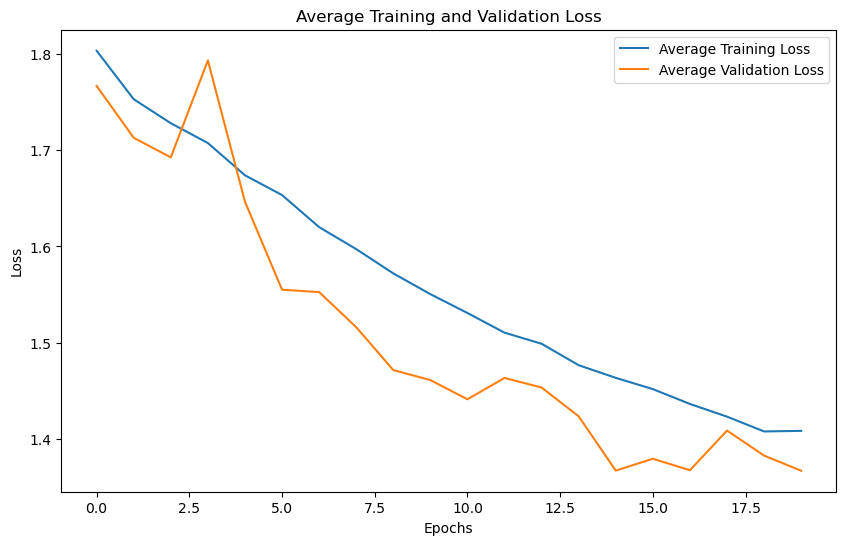

In [21]:
# Get the number of epochs from one of the training histories
num_epochs = len(training_results_model2_1[0]['loss'])

# Initialize lists to store the average loss and validation loss across all instances
avg_loss2_1 = []
avg_val_loss2_1 = []

# Calculate the average loss and validation loss for each epoch
for epoch in range(num_epochs):
    epoch_loss = [result['loss'][epoch] for result in training_results_model2_1]
    epoch_val_loss = [result['val_loss'][epoch] for result in training_results_model2_1]
    
    avg_loss2_1.append(np.mean(epoch_loss))
    avg_val_loss2_1.append(np.mean(epoch_val_loss))

# Plot the average training and validation loss across all instances
plt.figure(figsize=(10, 6))
plt.plot(avg_loss2_1, label='Average Training Loss')
plt.plot(avg_val_loss2_1, label='Average Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss')
plt.legend()
plt.show()

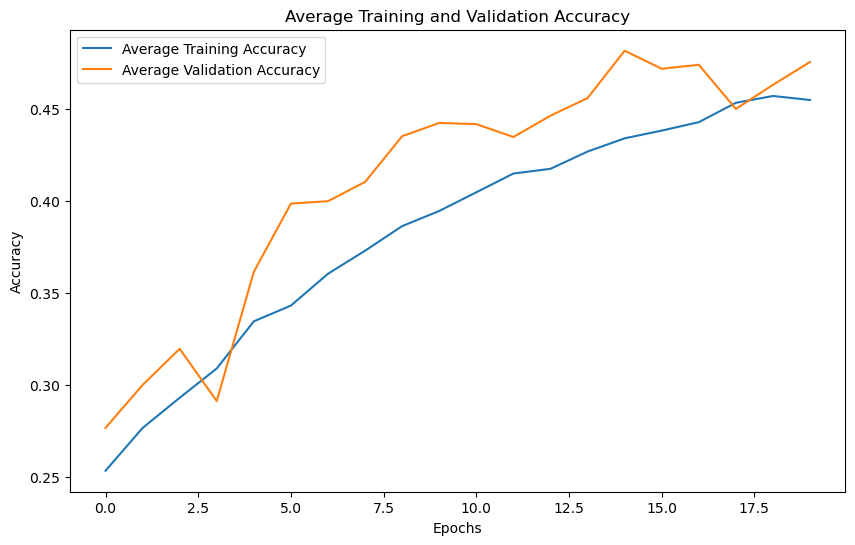

In [22]:
# Initialize lists to store the average accuracy and validation accuracy across all instances
avg_accuracy2_1 = []
avg_val_accuracy2_1 = []

# Calculate the average accuracy and validation accuracy for each epoch
for epoch in range(num_epochs):
    epoch_accuracy = [result['accuracy'][epoch] for result in training_results_model2_1]
    epoch_val_accuracy = [result['val_accuracy'][epoch] for result in training_results_model2_1]
    
    avg_accuracy2_1.append(np.mean(epoch_accuracy))
    avg_val_accuracy2_1.append(np.mean(epoch_val_accuracy))

# Plot the average training and validation accuracy across all instances
plt.figure(figsize=(10, 6))
plt.plot(avg_accuracy2_1, label='Average Training Accuracy')
plt.plot(avg_val_accuracy2_1, label='Average Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.legend()
plt.show()

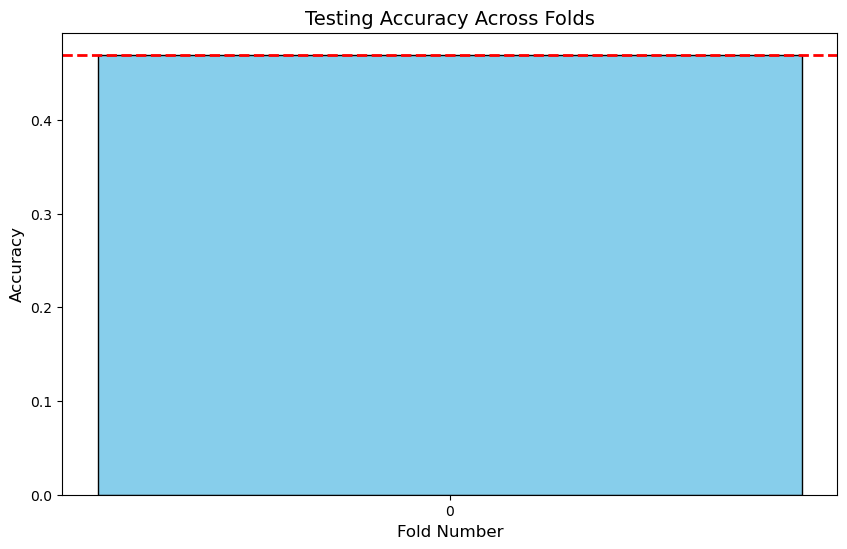

Average Accuracy:  0.4696837365627289
Standard Deviation:  0.0


In [23]:
# Calculate the average tseting accuracy
average2_1 = np.mean(testing_results_model2_1)
std2_1 = np.std(testing_results_model2_1)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(testing_results_model2_1)), testing_results_model2_1, color='skyblue', edgecolor='black', label='Values')

# Plot the average as a horizontal line
plt.axhline(average2_1, color='red', linestyle='--', linewidth=2, label=f'Average ({average2_1:.4f})')

# Add labels and title
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Testing Accuracy Across Folds', fontsize=14)
plt.xticks(range(len(testing_results_model2_1)))

# Show the plot
plt.show()

# Print average and standard deviation for accuracy
print("Average Accuracy: ", average2_1)
print("Standard Deviation: " , std2_1)

#### Model 2 with Changed Parameters

In [24]:
# for tracking performance
training_results_model2_2 = []
testing_results_model2_2 = []

# Using stratified k-fold, we call it like this:
for train_index, test_index in skf.split(X, labels_encoded):
    
    # Split the image arrays
    X_train, X_test = X[train_index], X[test_index]
    # Use one-hot encoded labels for the model
    y_train, y_test = y[train_index], y[test_index]

    # Convert one-hot encoded y_train back to categorical labels for stratification
    y_train_categorical = np.argmax(y_train, axis=1)
    # Create a stratified split for validation
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train_categorical, random_state=1)

    ### REPLACE THIS    
    # changes: 
    #    1. Baseline: 2 conv layers and two output layers
    cnn1 = Sequential()

    # data augmentation 
    cnn1.add(RandomFlip("horizontal"))
    cnn1.add(RandomRotation(0.10))
    cnn1.add(RandomTranslation(height_factor=0.1, width_factor=0.1))
    cnn1.add(RandomZoom(height_factor=0.1, width_factor=0.1))

    num_filt_layers = [36, 36]
    for num_filters in num_filt_layers:
        cnn1.add( Conv2D(filters=num_filters, 
                        kernel_size=(5,5), 
                        padding='same') )
        cnn1.add( Activation('relu'))
        cnn1.add( MaxPooling2D(pool_size=(3, 3), 
                            ) )
        

    # add one layer on flattened output
    cnn1.add( Flatten() )
    cnn1.add( Dense(1024, activation='relu') )
    cnn1.add( Dense(512, activation='relu') )
    cnn1.add( Dense(128, activation='relu') )
    cnn1.add( Dense(7, activation='softmax') )

    # Let's train the model 
    cnn1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    input_shape = [None, 48,48,3]
    cnn1.build(input_shape)

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras
    history = cnn1.fit(X_train_split, y_train_split, 
            batch_size=64, epochs=20, 
            shuffle=True, verbose=1,
            validation_data=(X_val,y_val))

    # track accuracy and loss for training data and validation data
    training_results_model2_2.append({
        'loss': history.history['loss'],
        'accuracy': history.history['accuracy'],
        'val_loss': history.history['val_loss'],
        'val_accuracy': history.history['val_accuracy']
    })

    # evaluate the model on the test data
    test_loss, test_accuracy = cnn1.evaluate(X_test, y_test)
    # add verbose = 0 later!!

    # remove the print statements later
    # we won't want them when we run 10 times
    print('Test Loss: ', test_loss)
    print("Test Accuracy:", test_accuracy)

    testing_results_model2_2.append(test_accuracy)

    # breaking for now so that we don't waste time running it a billion times (actually only five times LOLLLLL)
    break

Epoch 1/20
287/287 [==============================] - 35s 112ms/step - loss: 1.8093 - accuracy: 0.2548 - val_loss: 1.7882 - val_accuracy: 0.2627
Epoch 2/20
287/287 [==============================] - 34s 117ms/step - loss: 1.7664 - accuracy: 0.2687 - val_loss: 1.7262 - val_accuracy: 0.2935
Epoch 3/20
287/287 [==============================] - 31s 106ms/step - loss: 1.7329 - accuracy: 0.2868 - val_loss: 1.7017 - val_accuracy: 0.2994
Epoch 4/20
287/287 [==============================] - 31s 108ms/step - loss: 1.7169 - accuracy: 0.2983 - val_loss: 1.6924 - val_accuracy: 0.3014
Epoch 5/20
287/287 [==============================] - 32s 111ms/step - loss: 1.6980 - accuracy: 0.3153 - val_loss: 1.6576 - val_accuracy: 0.3341
Epoch 6/20
287/287 [==============================] - 39s 136ms/step - loss: 1.6700 - accuracy: 0.3338 - val_loss: 1.6366 - val_accuracy: 0.3544
Epoch 7/20
287/287 [==============================] - 32s 110ms/step - loss: 1.6426 - accuracy: 0.3479 - val_loss: 1.5817 - val_ac

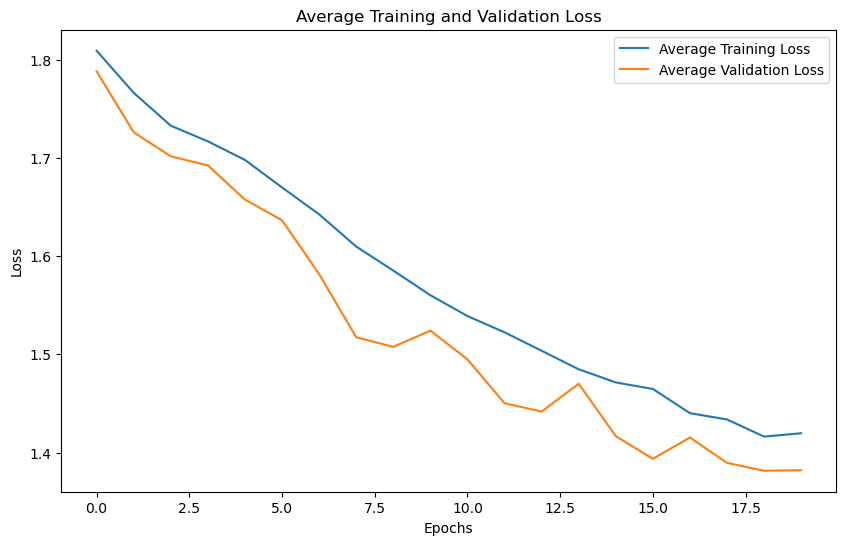

In [25]:
# Get the number of epochs from one of the training histories
num_epochs = len(training_results_model2_2[0]['loss'])

# Initialize lists to store the average loss and validation loss across all instances
avg_loss2_2 = []
avg_val_loss2_2 = []

# Calculate the average loss and validation loss for each epoch
for epoch in range(num_epochs):
    epoch_loss = [result['loss'][epoch] for result in training_results_model2_2]
    epoch_val_loss = [result['val_loss'][epoch] for result in training_results_model2_2]
    
    avg_loss2_2.append(np.mean(epoch_loss))
    avg_val_loss2_2.append(np.mean(epoch_val_loss))

# Plot the average training and validation loss across all instances
plt.figure(figsize=(10, 6))
plt.plot(avg_loss2_2, label='Average Training Loss')
plt.plot(avg_val_loss2_2, label='Average Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss')
plt.legend()
plt.show()

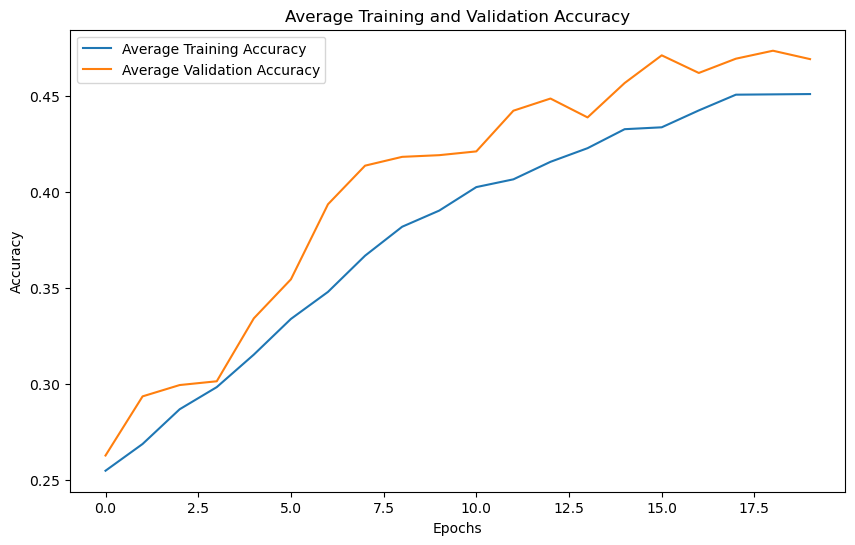

In [26]:
# Initialize lists to store the average accuracy and validation accuracy across all instances
avg_accuracy2_2 = []
avg_val_accuracy2_2 = []

# Calculate the average accuracy and validation accuracy for each epoch
for epoch in range(num_epochs):
    epoch_accuracy = [result['accuracy'][epoch] for result in training_results_model2_2]
    epoch_val_accuracy = [result['val_accuracy'][epoch] for result in training_results_model2_2]
    
    avg_accuracy2_2.append(np.mean(epoch_accuracy))
    avg_val_accuracy2_2.append(np.mean(epoch_val_accuracy))

# Plot the average training and validation accuracy across all instances
plt.figure(figsize=(10, 6))
plt.plot(avg_accuracy2_2, label='Average Training Accuracy')
plt.plot(avg_val_accuracy2_2, label='Average Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.legend()
plt.show()

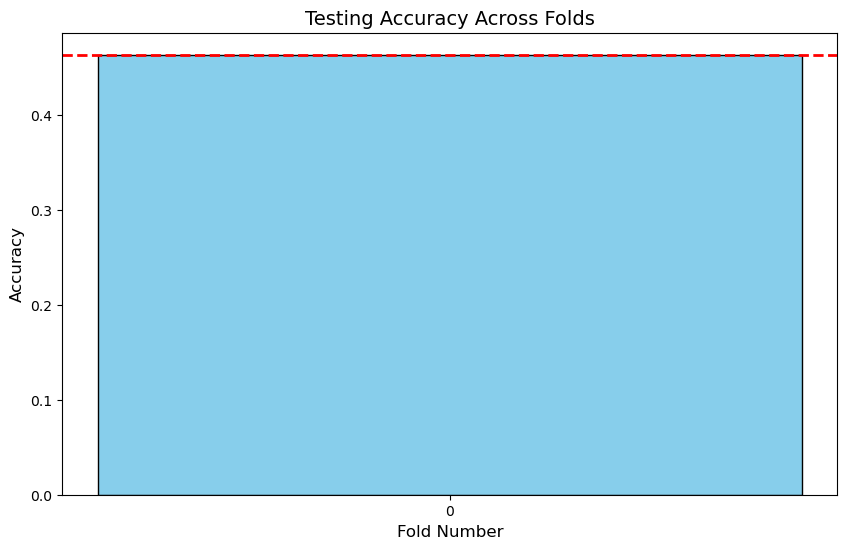

Average Accuracy:  0.4639175236225128
Standard Deviation:  0.0


In [27]:
# Calculate the average tseting accuracy
average2_2 = np.mean(testing_results_model2_2)
std2_2 = np.std(testing_results_model2_2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(testing_results_model2_2)), testing_results_model2_2, color='skyblue', edgecolor='black', label='Values')

# Plot the average as a horizontal line
plt.axhline(average2_2, color='red', linestyle='--', linewidth=2, label=f'Average ({average2_2:.4f})')

# Add labels and title
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Testing Accuracy Across Folds', fontsize=14)
plt.xticks(range(len(testing_results_model2_2)))

# Show the plot
plt.show()

# Print average and standard deviation for accuracy
print("Average Accuracy: ", average2_2)
print("Standard Deviation: " , std2_2)

### Performance Comparison

In [36]:
t = 2.26 / np.sqrt(split_no) #sqrt 10 because we did 10 shuffles when running the models before

comparisons = [
    ("1_1 vs 1_2", testing_results_model1_1, testing_results_model1_2),
    ("1_1 vs 2_1", testing_results_model1_1, testing_results_model2_1),
    ("1_1 vs 2_2", testing_results_model1_1, testing_results_model2_2),
    ("1_2 vs 2_1", testing_results_model1_2, testing_results_model2_1),
    ("1_2 vs 2_2", testing_results_model1_2, testing_results_model2_2),
    ("2_1 vs 2_2", testing_results_model2_1, testing_results_model2_2),
]

for name, model1, model2 in comparisons:
    # compare model 1 minus model 2
    d = [a - b for a, b in zip(model1, model2)]
    stdtot = np.std(d)
    dbar = np.mean(d)
    print ('Difference of ' , name , 'has a range of: ', dbar-t*stdtot, ' to ', dbar+t*stdtot)


Difference of  1_1 vs 1_2 has a range of:  0.015551328659057617  to  0.015551328659057617
Difference of  1_1 vs 2_1 has a range of:  0.05678841471672058  to  0.05678841471672058
Difference of  1_1 vs 2_2 has a range of:  0.06255462765693665  to  0.06255462765693665
Difference of  1_2 vs 2_1 has a range of:  0.041237086057662964  to  0.041237086057662964
Difference of  1_2 vs 2_2 has a range of:  0.04700329899787903  to  0.04700329899787903
Difference of  2_1 vs 2_2 has a range of:  0.0057662129402160645  to  0.0057662129402160645


Because each of these 95% confidence intervals contain XXXXXXXX, we XXXXXXC conclude that any of the models are statistically better than the others. Specifically, there is not a statistically significant difference in performance for using a XXXX, XXXXXXXXXXXX, or .

### MLP Code

In [67]:
# values we need for the plot (we will plot only one of the ten instances of the model)
ex_fpr1 = dict()
ex_tpr1 = dict()
ex_roc_auc1 = dict()
count = 0

# for tracking performance of all 10 splits
micro_aucs1 = []
macro_aucs1 = []

# Using stratified k-fold, we call it like this:
for train_index, test_index in skf.split(X, labels_encoded):
    
    # track the number split we're on, so we can save the data for the first split
    count += 1
    
    # Split the image arrays
    X_train, X_test = X[train_index], X[test_index]
    # Use one-hot encoded labels for the model
    y_train, y_test = y[train_index], y[test_index]

    # Convert one-hot encoded y_train back to categorical labels for stratification
    y_train_categorical = np.argmax(y_train, axis=1)
    # Create a stratified split for validation
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train_categorical, random_state=1)

    ### REPLACE THIS    
    # make a keras MLP
    mlp = Sequential()
    mlp.add( Flatten() )
    mlp.add( Dense(input_dim=1, units=1024, activation='relu') )
    mlp.add( Dense(units=512, activation='relu') )
    mlp.add( Dense(units=128, activation='relu') )
    mlp.add( Dense(7) ) #not sure about this
    mlp.add( Activation('softmax') )

    mlp.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    input_shape = [None, 48,48,3]
    mlp.build(input_shape)

    history = mlp.fit(X_train_split, y_train_split, 
            batch_size=64, epochs=8, 
            shuffle=True, verbose=1)

    # Predict probabilities on the test set (needed for ROC curve)
    y_pred_proba = mlp.predict(X_test, verbose=0)  # This gives predicted probabilities for each class
    y_pred_labels = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels

    # find the true labels
    y_true = np.argmax(y_test, axis=1)

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    n_classes = 7  # Number of classes

    for i in range(n_classes):
        # For each class, calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute Macro and Micro AUCs
    macro_auc = roc_auc_score(y_true, y_pred_proba, average="macro", multi_class="ovr")
    micro_auc = roc_auc_score(y_true, y_pred_proba, average="micro", multi_class="ovr")

    # add to list to store
    macro_aucs1.append(macro_auc)
    micro_aucs1.append(micro_auc)

    #save the data for the first split
    if count == 1:
        ex_fpr1 = fpr
        ex_tpr1 = tpr
        ex_roc_auc1 = roc_auc

    # breaking for now so that we don't waste time running it a billion times (actually only five times LOLLLLL)
    break

Epoch 1/8
287/287 [==============================] - 27s 88ms/step - loss: 2.0466 - accuracy: 0.2499
Epoch 2/8
287/287 [==============================] - 23s 79ms/step - loss: 1.7363 - accuracy: 0.3041
Epoch 3/8
287/287 [==============================] - 23s 80ms/step - loss: 1.6993 - accuracy: 0.3265
Epoch 4/8
287/287 [==============================] - 25s 87ms/step - loss: 1.6753 - accuracy: 0.3442
Epoch 5/8
287/287 [==============================] - 24s 83ms/step - loss: 1.6608 - accuracy: 0.3478
Epoch 6/8
287/287 [==============================] - 23s 79ms/step - loss: 1.6499 - accuracy: 0.3517
Epoch 7/8
287/287 [==============================] - 23s 80ms/step - loss: 1.6414 - accuracy: 0.3534
Epoch 8/8
287/287 [==============================] - 25s 89ms/step - loss: 1.6181 - accuracy: 0.3683


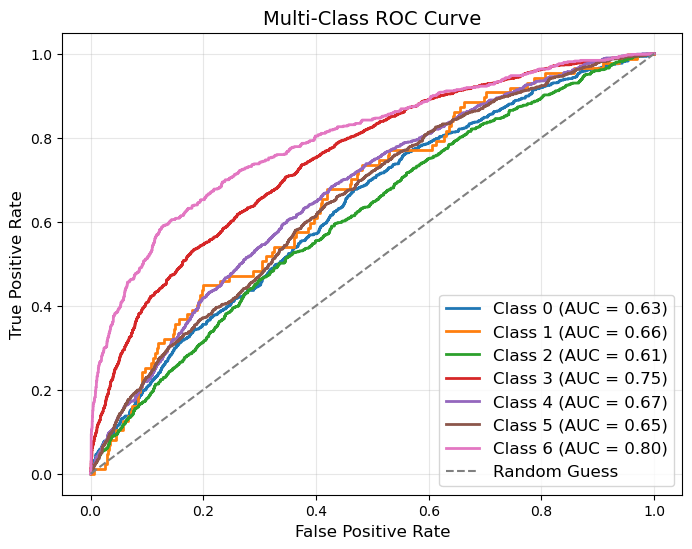

In [68]:
# Plot ROC curve for each class
n_classes = 7

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(ex_fpr1[i], ex_tpr1[i], lw=2, label=f"Class {i} (AUC = {ex_roc_auc1[i]:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Multi-Class ROC Curve", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Comparison of MLP to CNN (Make sure plotting correct CNN Performance. Y is generic)

179/179 [==============================] - 3s 17ms/step


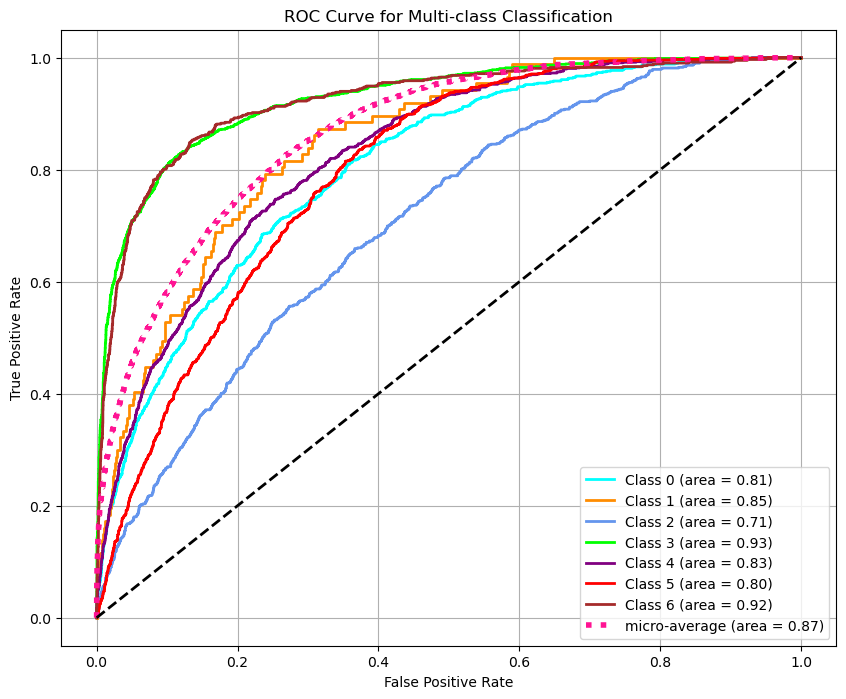

In [69]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

#Need to ensure that it is using the y of the model we comapre to
n_classes = 7  # Number of classes (update based on your problem)
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=np.arange(n_classes))
# Get predicted probabilities for the test set
y_pred_prob = model1_1.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

micro_aucs2 = []
macro_aucs2 = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
macro_auc = roc_auc_score(y_test, y_pred_prob, average="macro", multi_class="ovr")
micro_auc = roc_auc_score(y_test, y_pred_prob, average="micro", multi_class="ovr")

macro_aucs2.append(macro_auc)
micro_aucs2.append(micro_auc)

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lime', 'purple', 'red', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average (area = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot diagonal for random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [71]:
t = 2.26 / np.sqrt(split_no) #sqrt 10 because we did 10 shuffles when running the models before
# compare on the basis of micro averaged auc
d = [a - b for a, b in zip(micro_aucs1, micro_aucs2)]
stdtot = np.std(d)
dbar = np.mean(d)
print ('MICRO AVERAGED AUCS:')
print ('Difference of XXXXXXXXXXx - XXXXXXXXXXx has a range of: ', dbar-t*stdtot, ' to ', dbar+t*stdtot)

# compare on the basis of macro averaged auc
d = [a - b for a, b in zip(macro_aucs1, macro_aucs2)]
stdtot = np.std(d)
dbar = np.mean(d)
print ('MACRO AVERAGED AUCS:')
print('Difference of XXXXXXXXXXx - XXXXXXXXX has a range of: ', dbar-t*stdtot, ' to ', dbar+t*stdtot)

[0.8671988701562344]
MICRO AVERAGED AUCS:
Difference of Wide & Deep - No Wide has a range of:  -0.1328171361435765  to  -0.1328171361435765
MACRO AVERAGED AUCS:
Difference of Wide & Deep - No Wide has a range of:  -0.15098357899236825  to  -0.15098357899236825


### Exceptional Work

In [72]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(7, activation='softmax')(x)  # Adjust for the number of classes in your task

# Define the complete model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Compare performance with the previous model
print(f"Test accuracy with transfer learning: {test_accuracy}")


58889256/58889256 [==============================] - 7s 0us/step
Epoch 1/10
716/716 [==============================] - 144s 199ms/step - loss: 1.6256 - accuracy: 0.3604 - val_loss: 1.5559 - val_accuracy: 0.3972
Epoch 2/10
716/716 [==============================] - 143s 200ms/step - loss: 1.5320 - accuracy: 0.4075 - val_loss: 1.5060 - val_accuracy: 0.4104
Epoch 3/10
716/716 [==============================] - 778s 1s/step - loss: 1.4783 - accuracy: 0.4288 - val_loss: 1.4158 - val_accuracy: 0.4652
Epoch 4/10
716/716 [==============================] - 135s 189ms/step - loss: 1.4261 - accuracy: 0.4505 - val_loss: 1.3524 - val_accuracy: 0.4885
Epoch 5/10
716/716 [==============================] - 135s 189ms/step - loss: 1.3647 - accuracy: 0.4797 - val_loss: 1.2914 - val_accuracy: 0.5097
Epoch 6/10
716/716 [==============================] - 133s 186ms/step - loss: 1.3032 - accuracy: 0.5020 - val_loss: 1.2458 - val_accuracy: 0.5189
Epoch 7/10
716/716 [==============================] - 241s 337

In [73]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
import tensorflow as tf

# Assuming X is your input image data and y is the one-hot encoded labels
# n_classes = 7 is the number of classes you have in your dataset
n_classes = 7

# Setup Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Results to track performance
testing_results = []

for train_index, val_index in skf.split(X, np.argmax(y, axis=1)):
    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Convert labels into binary format (one-hot encoded)
    y_train_bin = label_binarize(np.argmax(y_train, axis=1), classes=np.arange(n_classes))
    y_val_bin = label_binarize(np.argmax(y_val, axis=1), classes=np.arange(n_classes))

    # Load the pre-trained VGG16 model (exclude the top layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

    # Freeze all layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom top layers on top of the VGG16 model
    x = Flatten()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(n_classes, activation='softmax')(x)

    # Define the complete model
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the training data
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

    # Evaluate the model on the validation data
    val_loss, val_accuracy = model.evaluate(X_val, y_val)

    # Store the test accuracy
    testing_results.append(val_accuracy)

    print(f"Validation Accuracy for this fold: {val_accuracy}")

# Print the average testing accuracy across all folds
print(f"Average Validation Accuracy across all folds: {np.mean(testing_results)}")



Epoch 1/10
358/358 [==============================] - 131s 361ms/step - loss: 1.7038 - accuracy: 0.3188 - val_loss: 1.6161 - val_accuracy: 0.3711
Epoch 2/10
358/358 [==============================] - 137s 382ms/step - loss: 1.6202 - accuracy: 0.3683 - val_loss: 1.5682 - val_accuracy: 0.3944
Epoch 3/10
358/358 [==============================] - 136s 381ms/step - loss: 1.5855 - accuracy: 0.3791 - val_loss: 1.5598 - val_accuracy: 0.4042
Epoch 4/10
358/358 [==============================] - 139s 389ms/step - loss: 1.5620 - accuracy: 0.3951 - val_loss: 1.5482 - val_accuracy: 0.4036
Epoch 5/10
358/358 [==============================] - 139s 389ms/step - loss: 1.5421 - accuracy: 0.4032 - val_loss: 1.5347 - val_accuracy: 0.4129
Epoch 6/10
358/358 [==============================] - 135s 376ms/step - loss: 1.5260 - accuracy: 0.4076 - val_loss: 1.5227 - val_accuracy: 0.4213
Epoch 7/10
358/358 [==============================] - 147s 412ms/step - loss: 1.5069 - accuracy: 0.4191 - val_loss: 1.5113 -

KeyboardInterrupt: 

In [79]:
d = [a - b for a, b in zip(testing_results, testing_results_model1_1)]
stdtot = np.std(d)
dbar = np.mean(d)
print ('Difference of XXXXXXXXXXx - XXXXXXXXXXx has a range of: ', dbar-t*stdtot, ' to ', dbar+t*stdtot)

Difference of XXXXXXXXXXx - XXXXXXXXXXx has a range of:  -0.09942340850830078  to  -0.09942340850830078
